In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from easydict import EasyDict as edict
from collections import Counter
import pickle
import rpy2.robjects as robj
import numpy as np


%matplotlib inline

In [3]:
resDir = Path("./demoResults")

### Load the data

Datasets are simulated

In [4]:
robj.r["load"](f"/home/huaqingj/MyResearch/TVDN/demo/demoData/dataMat_Nsim50_Chg3_rank6_len180.RData")

'datamatrix','truematrix','candlist0','U'


### Parameters

In [5]:
kappa = 1.53
lamb = 1e-6
r = 6
Lmin = 10
fct = 2
kappas = np.linspace(1.45, 2, 100)

## Run

In [6]:
DetObjs = []
for i in tqdm(range(len(robj.r["datamatrix"]))):
    Ymat = np.array(robj.r["datamatrix"][i])
    DetRec = TVDNDetect(Ymat=Ymat, dataType="fMRI", fName=f"sps_{i}", MaxM=10, is_detrend=False,
                      saveDir=resDir, showProgress=False, Lmin=Lmin, lamb=lamb, kappa=kappa, r=r, fct=fct)
    DetRec()
    DetRec.TuningKappa(kappas)
    DetObjs.append(DetRec)

  0%|          | 0/50 [00:00<?, ?it/s]/home/huaqingj/MyResearch/TVDN/pyTVDN/TVDNclass.py:294: UserWarning: As loading the saved results, kappa will be ignored
  warnings.warn("As loading the saved results, kappa will be ignored", UserWarning)
100%|██████████| 50/50 [00:00<00:00, 143.28it/s]


## Results 

In [7]:
d, n = DetObjs[0].Ymat.shape
cpts =  np.array(robj.r["candlist0"])[1:-1]
cpts = cpts.astype(int)

### Plots under the true number of change points

In [8]:
ecptss = [DetObj.ecpts for DetObj in DetObjs]

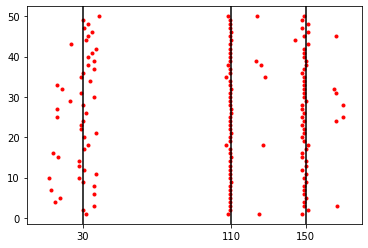

In [9]:
simuIdx = []
pos = []
for idx, chgpts in enumerate(ecptss):
    pos += list(chgpts)
    simuIdx += ([idx+1]*len(chgpts))
plt.plot(pos, simuIdx, ".", color="red")
plt.xlim([0, n])
plt.xticks(cpts, cpts)
for cpt in cpts:
    plt.axvline(cpt, color="black")

### Change the number of change points

In [12]:
for DetObj in DetObjs:
    DetObj.UpdateEcpts(3) # Reconstruct the Xmat and estiamte the eigen values, again
ecptss = [DetObj.ecpts for DetObj in DetObjs]

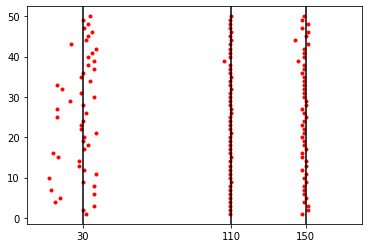

In [13]:
simuIdx = []
pos = []
for idx, chgpts in enumerate(ecptss):
    pos += list(chgpts)
    simuIdx += ([idx+1]*len(chgpts))
plt.plot(pos, simuIdx, ".", color="red")
plt.xlim([0, n])
plt.xticks(cpts, cpts)
for cpt in cpts:
    plt.axvline(cpt, color="black")